## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
data=pd.read_csv("data.csv")

## EDA

In [308]:
data.shape

(569, 33)

In [309]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Missing Values

In [312]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Data Cleaning

In [3]:
data.drop(['id','Unnamed: 32'],axis = 1,inplace = True)

In [314]:
data.shape

(569, 31)

In [4]:
data["diagnosis"] = [1 if i.strip()=="M" else 0 for i in data.diagnosis]

In [316]:
data.describe().T

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

In [317]:
data.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

In [318]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [319]:
data.duplicated().sum()

0

In [320]:
data.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

diagnosis
0    357
1    212
Name: count, dtype: int64
Imbalace ratio:1.68


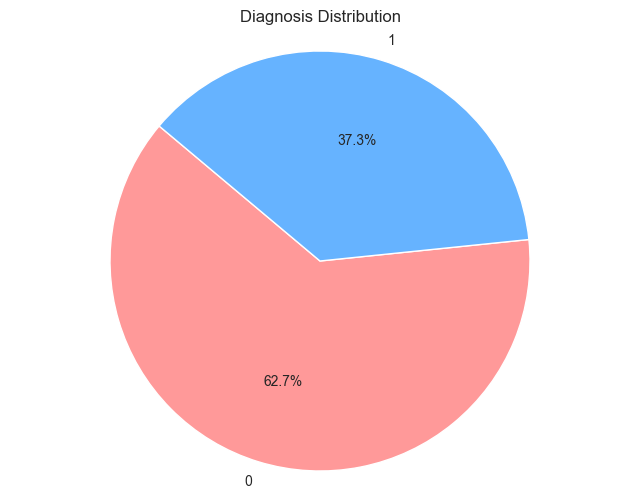

<Axes: xlabel='diagnosis', ylabel='count'>

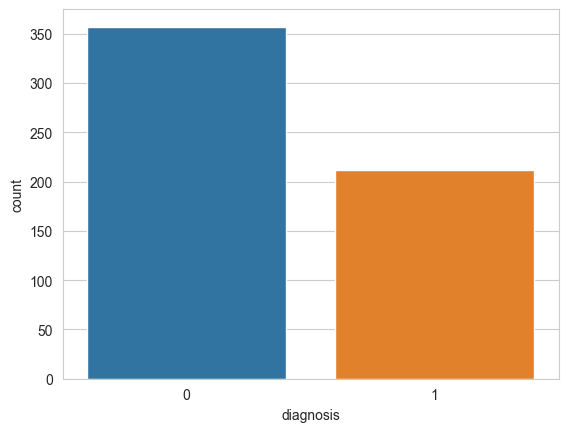

In [79]:
sns.set_style('whitegrid')

diagnosis_counts = data['diagnosis'].value_counts()
print(diagnosis_counts)
print("Imbalace ratio:1.68")
plt.figure(figsize=(8, 6)) 
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])  # Plot the pie chart
plt.axis('equal') 
plt.title('Diagnosis Distribution') 
plt.show() ; sns.countplot(x='diagnosis',data=data,)

In [322]:
data.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

In [9]:
df_mean=data.iloc[:,1:11]
df_se=data.iloc[:,11:22]
df_worst=data.iloc[:,23:]

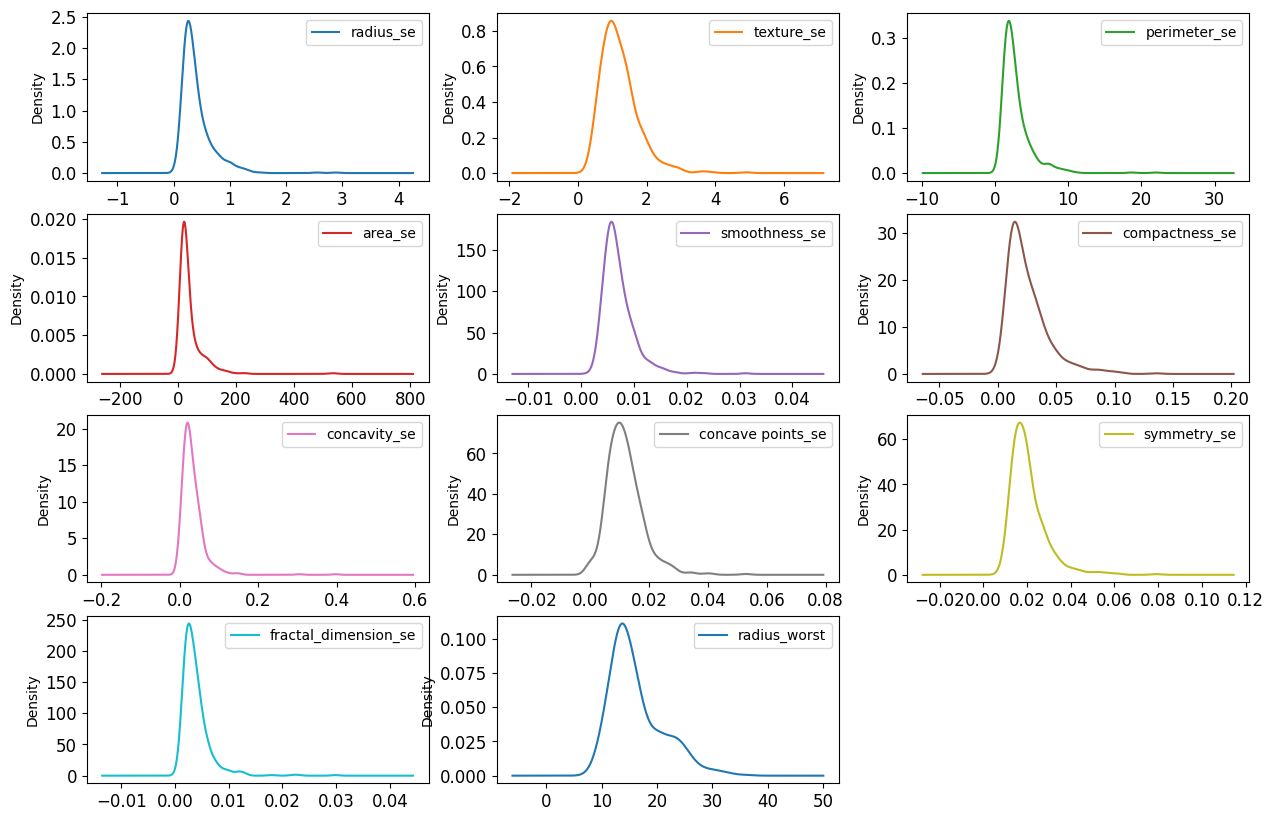

In [10]:
plt = df_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))

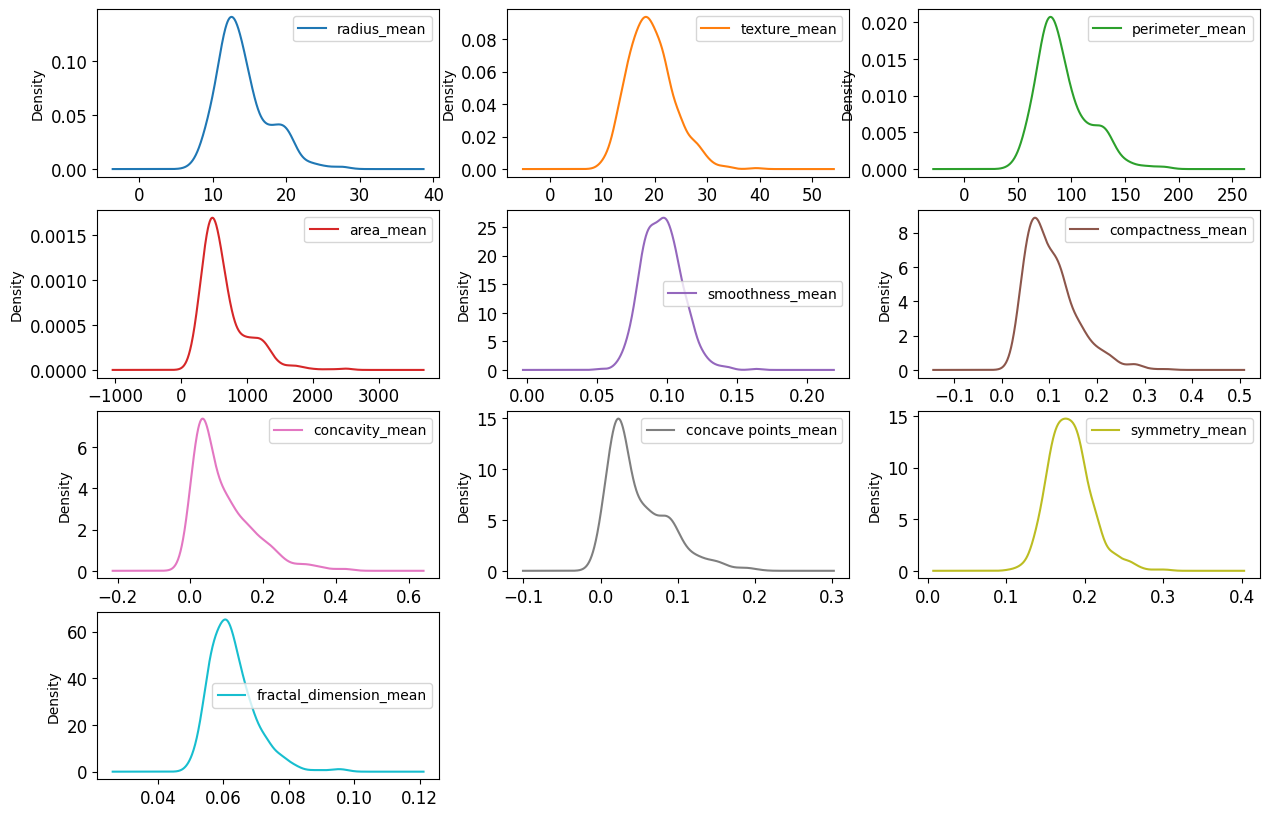

In [11]:
plt = df_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))

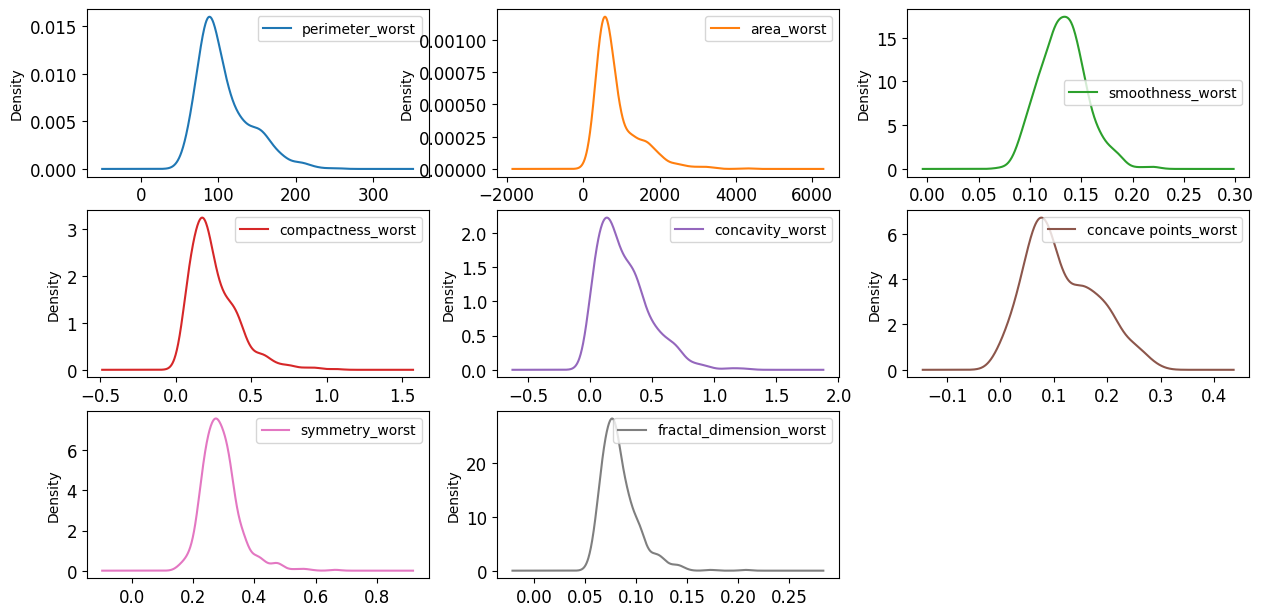

In [12]:
plt = df_worst.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                    sharey=False, fontsize=12, figsize=(15,10))

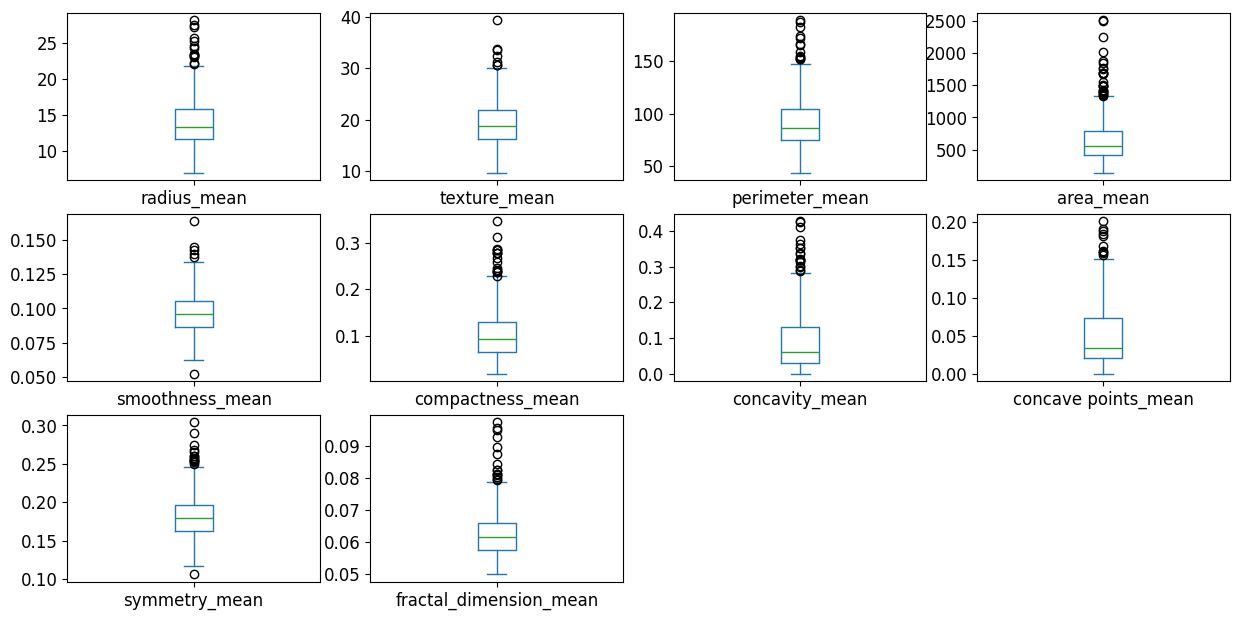

In [21]:
plt=df_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12, figsize=(15,10))

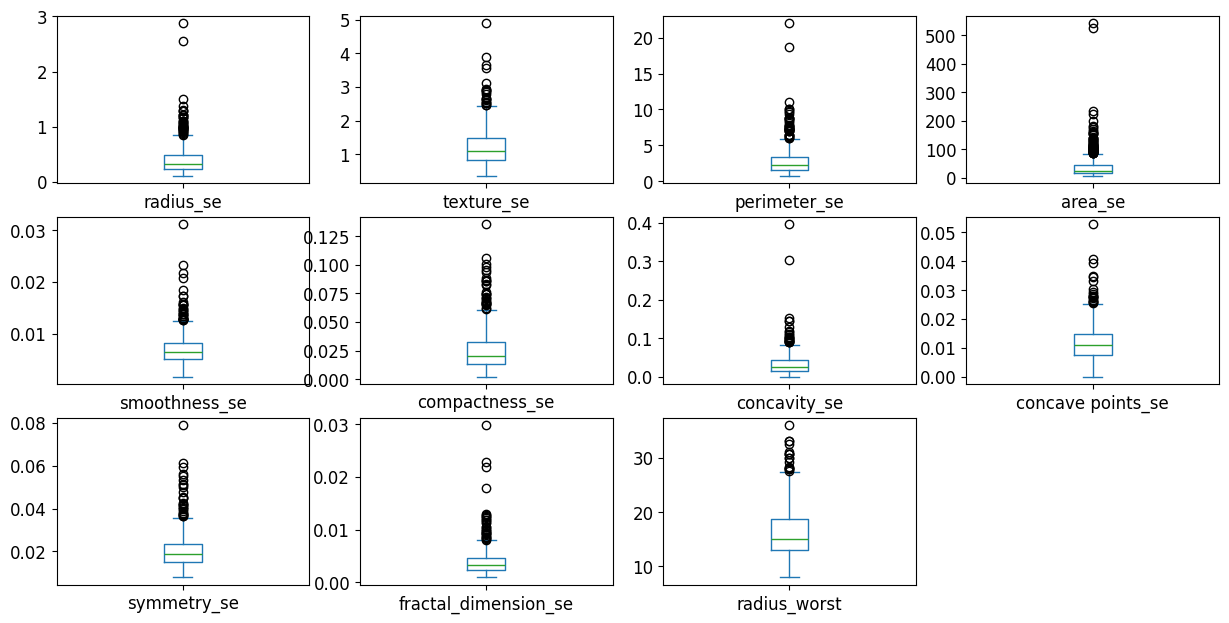

In [23]:
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,
                 fontsize=12, figsize=(15,10))

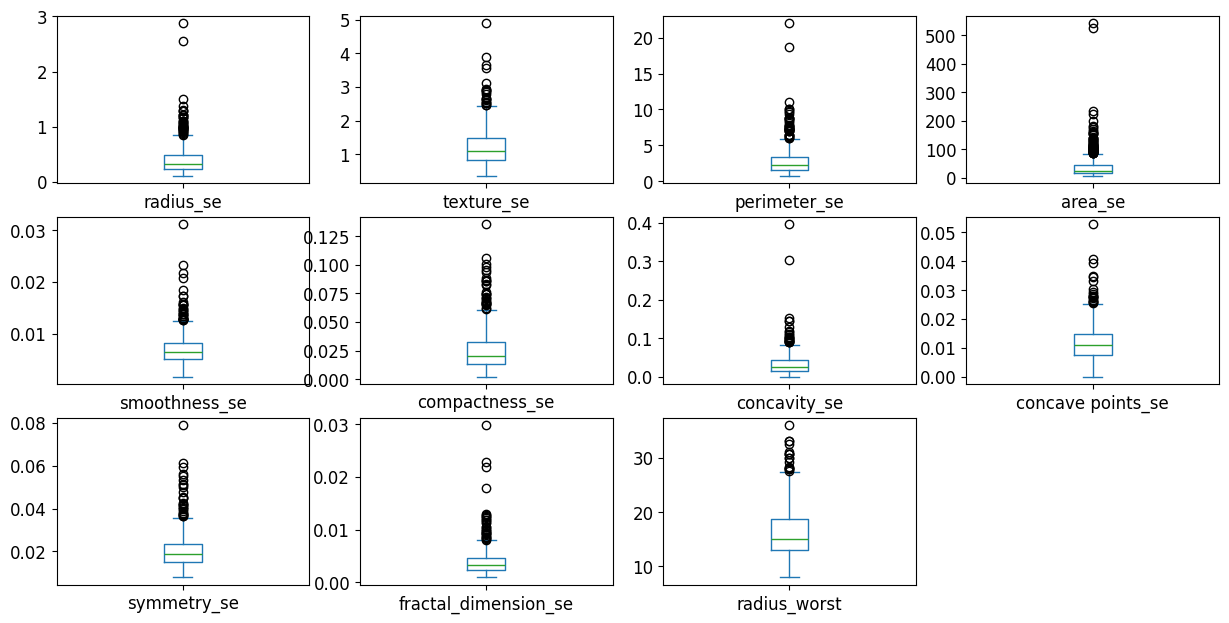

In [24]:
plt=df_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, 
               fontsize=12, figsize=(15,10))

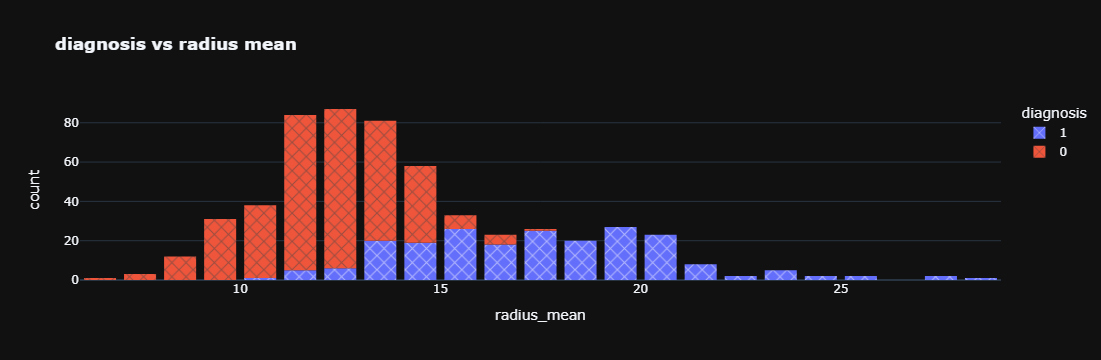

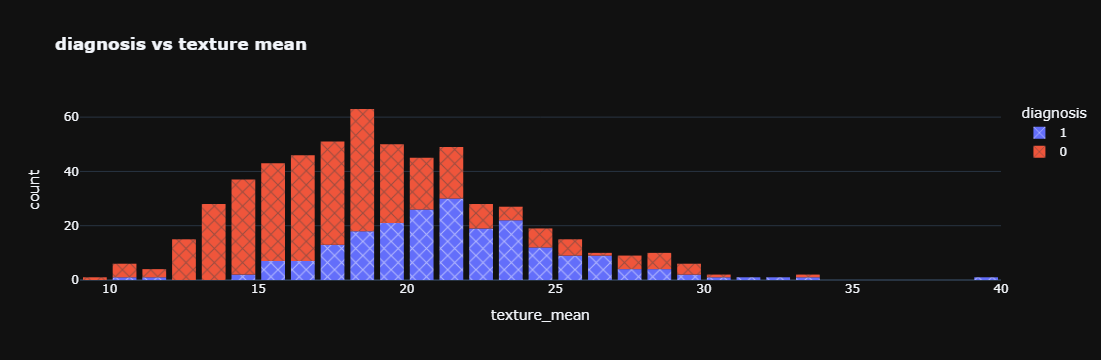

In [323]:
fig = px.histogram(data_frame = data,
             x = "radius_mean",
             color="diagnosis", title="<b>diagnosis vs radius mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "texture_mean",
             color="diagnosis", title="<b>diagnosis vs texture mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()         # All cancer tumors of type M(1) have radius less than 18 
                    # All cancer tumors of type B(0) have radius greather than 10
                    # upto 19.99 texture mean value cancer tumors of type B are more
                    # From 19.99 texture mean value cancer tumors of type M are more

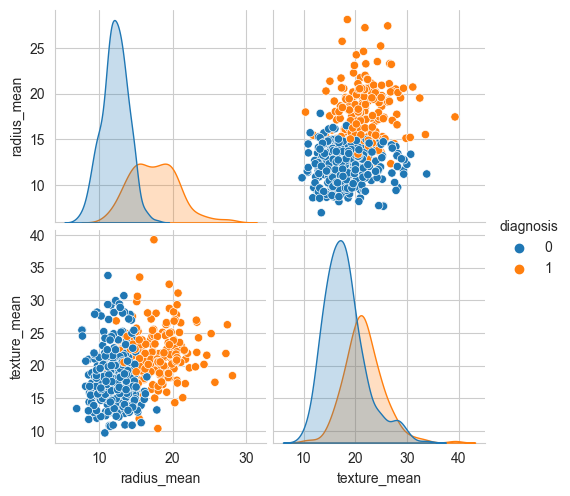

In [329]:
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean'
        ]

sns.pairplot(data=data[cols], hue='diagnosis')   
# All tumors of type M have more texture and radius mean than type B tumors¶
# Mean of texture greather than mean of radius in both the tumors and mean values are greather in tumor M

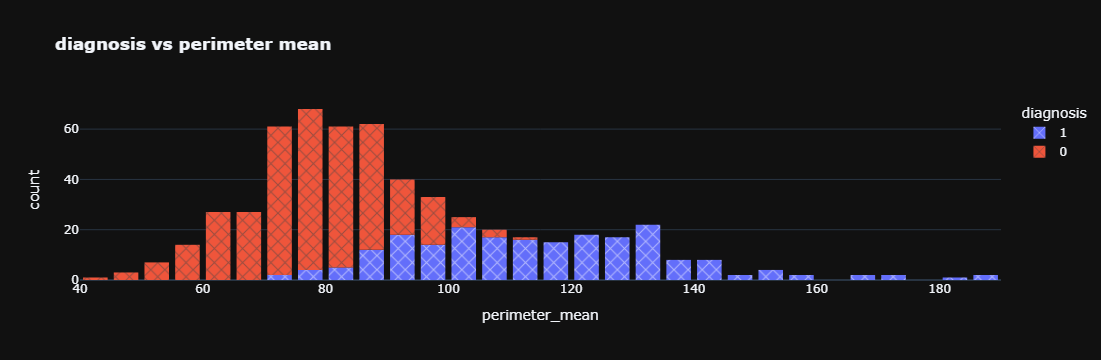

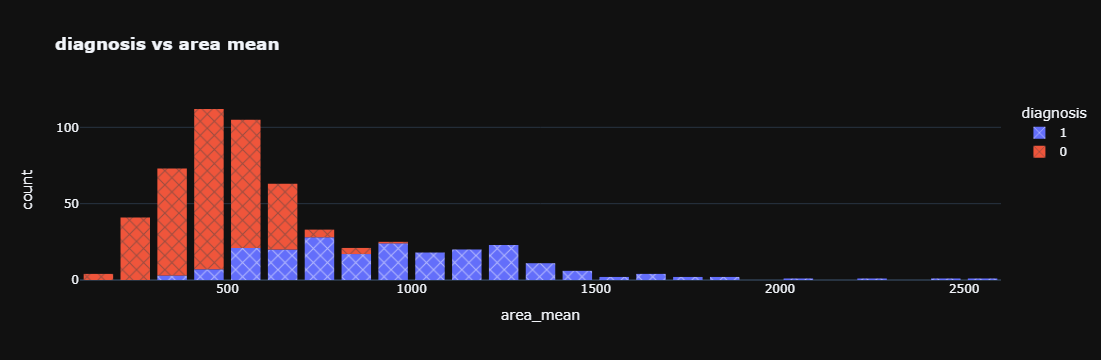

In [330]:
fig = px.histogram(data_frame = data,
             x = "perimeter_mean",
             color="diagnosis", title="<b>diagnosis vs perimeter mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "area_mean",
             color="diagnosis", title="<b>diagnosis vs area mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

# All cancer tumors of type M have perimeter mean less than 110-115 and most of them are between 75-80.
# All cancer tumors of type B have radius greather than 70 and most of them are between 130-135
# upto 700 area mean value cancer tumors of type B are more
# From 700 texture mean value cancer tumors of type M are more

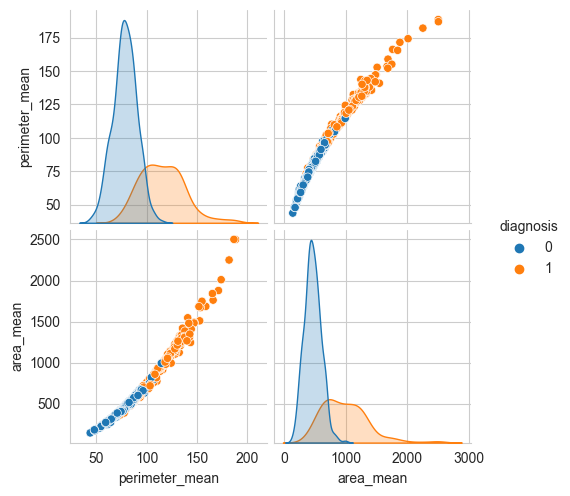

In [331]:
cols = ['diagnosis', 
        'perimeter_mean', 
        'area_mean' 
        ]

sns.pairplot(data=data[cols], hue='diagnosis')

# All tumors of type M have more perimeter and area mean than type B tumors
# Mean of perimeter less than mean of area in both the tumors and mean values are greather in tumor M

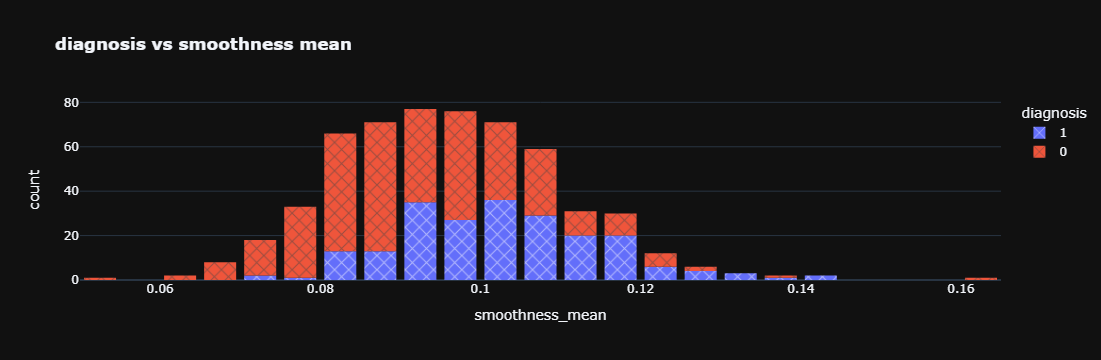

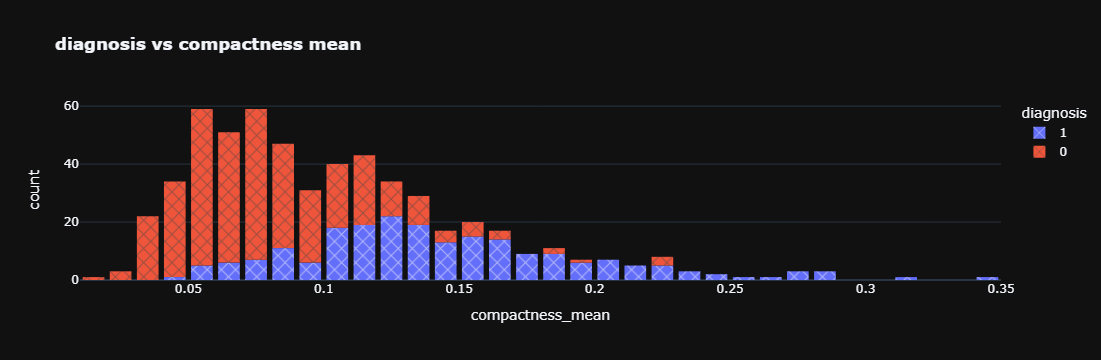

In [332]:
fig = px.histogram(data_frame = data,
             x = "smoothness_mean",
             color="diagnosis", title="<b>diagnosis vs smoothness mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "compactness_mean",
             color="diagnosis", title="<b>diagnosis vs compactness mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

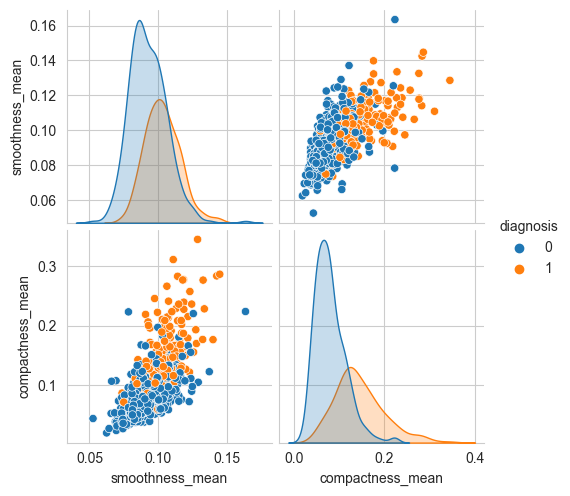

In [333]:
cols = ['diagnosis',
        'smoothness_mean',
        'compactness_mean',
        ]

sns.pairplot(data=data[cols], hue='diagnosis')

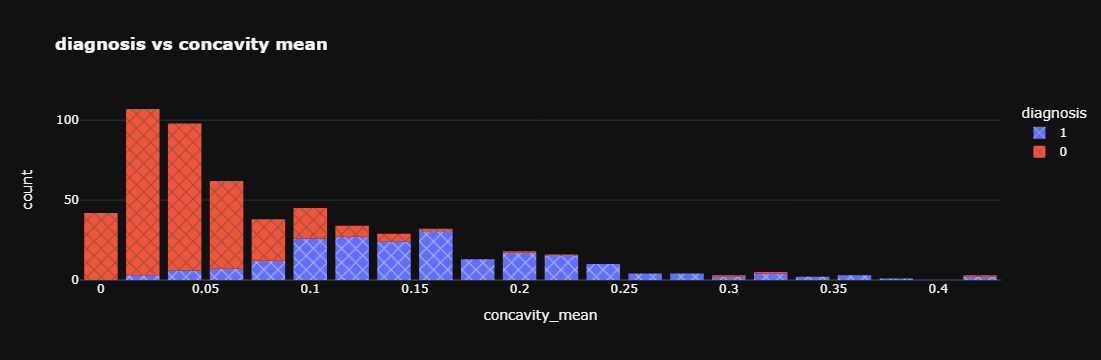

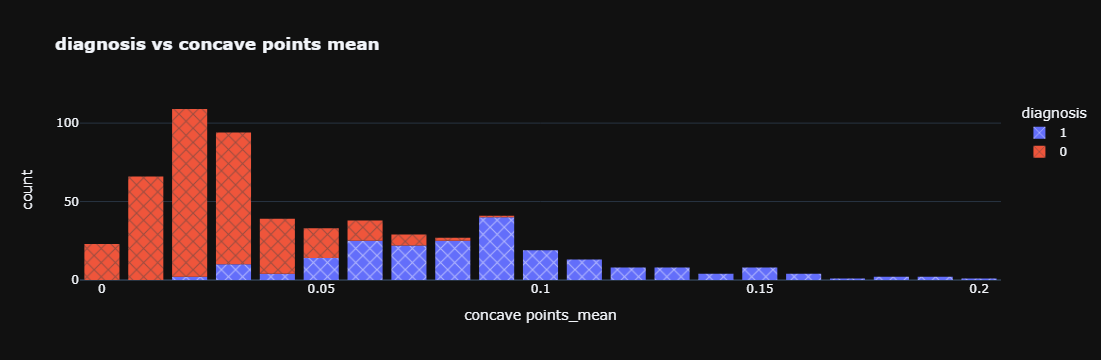

In [334]:
fig = px.histogram(data_frame = data,
             x = "concavity_mean",
             color="diagnosis", title="<b>diagnosis vs concavity mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "concave points_mean",
             color="diagnosis", title="<b>diagnosis vs concave points mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

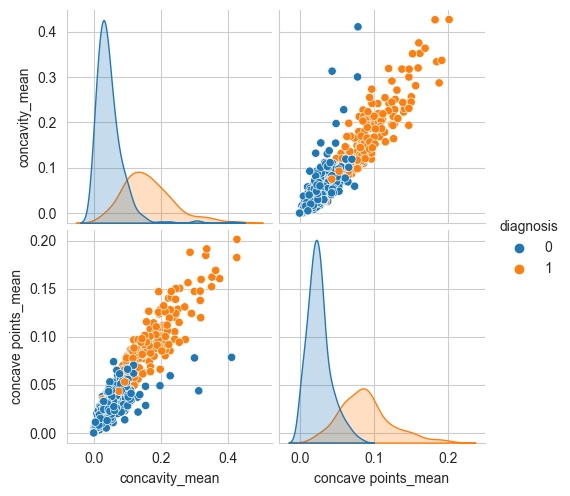

In [335]:
cols = ['diagnosis', 
        'concavity_mean',
        'concave points_mean', 
        ]

sns.pairplot(data=data[cols], hue='diagnosis')

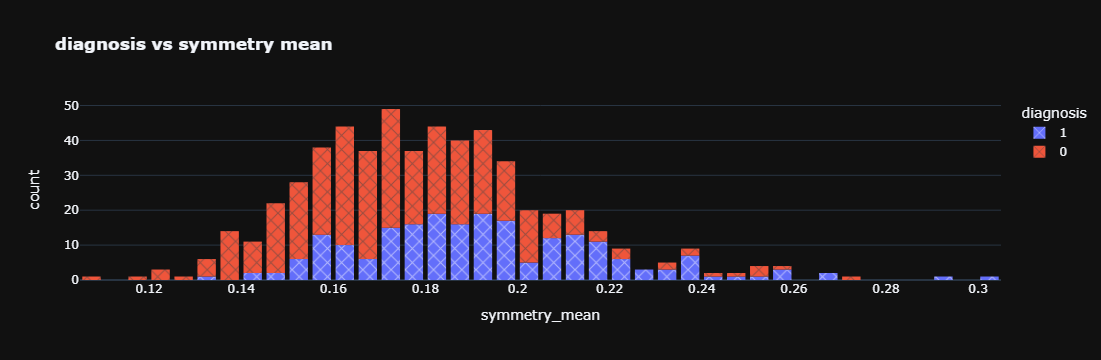

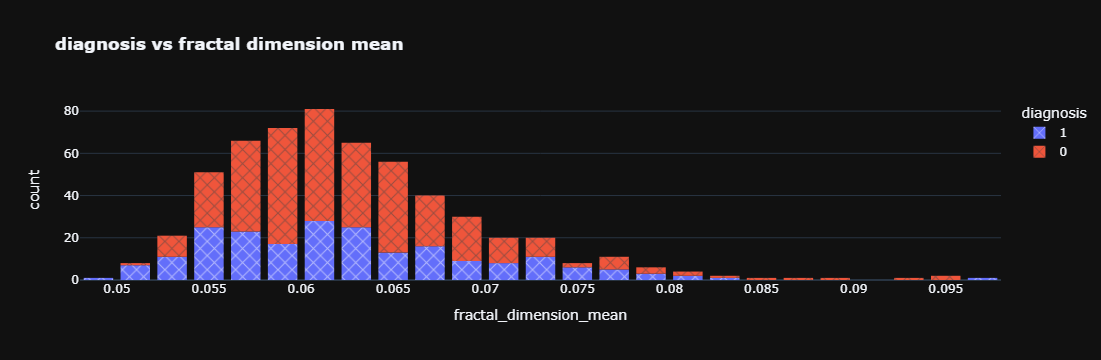

In [336]:
fig = px.histogram(data_frame = data,
             x = "symmetry_mean",
             color="diagnosis", title="<b>diagnosis vs symmetry mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "fractal_dimension_mean",
             color="diagnosis", title="<b>diagnosis vs fractal dimension mean</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()


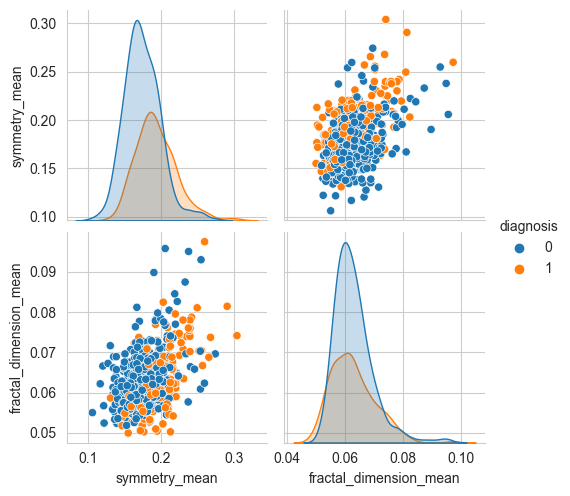

In [337]:
cols = ['diagnosis',
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=data[cols], hue='diagnosis')

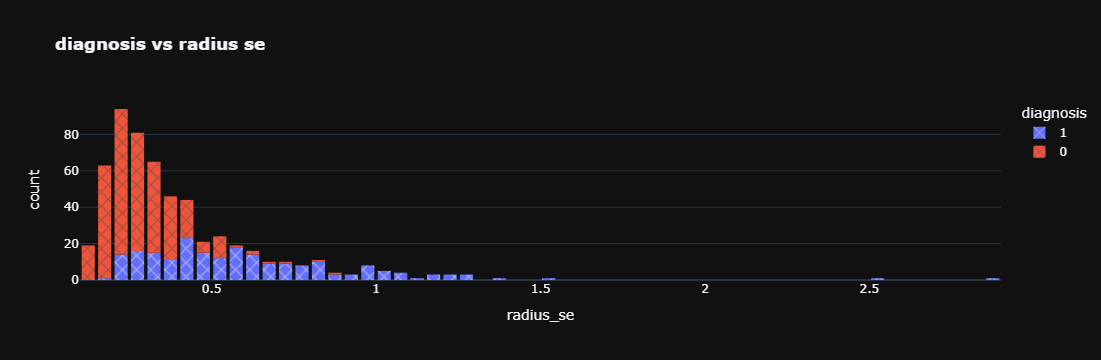

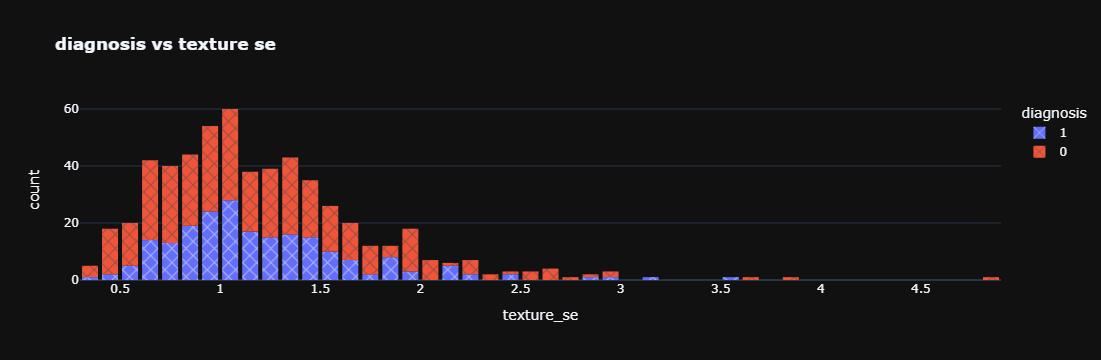

In [338]:
fig = px.histogram(data_frame =data,
             x = "radius_se",
             color="diagnosis", title="<b>diagnosis vs radius se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "texture_se",
             color="diagnosis", title="<b>diagnosis vs texture se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

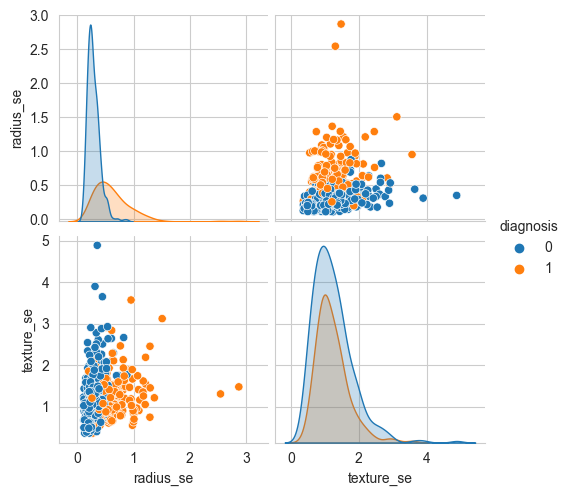

In [339]:
cols = ['diagnosis',
        "radius_se",
        "texture_se"]

sns.pairplot(data=data[cols], hue='diagnosis')

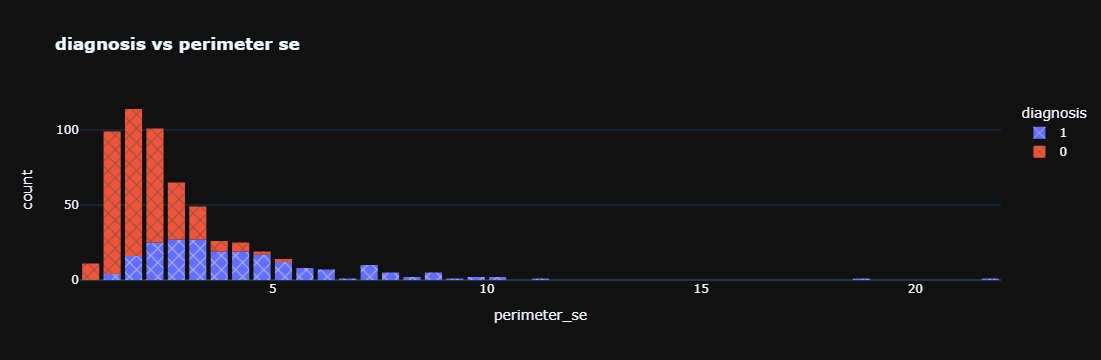

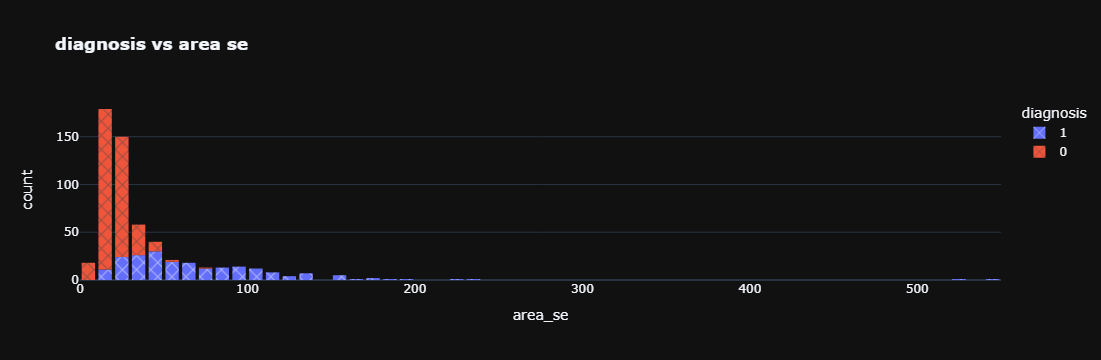

In [340]:
fig = px.histogram(data_frame = data,
             x = "perimeter_se",
             color="diagnosis", title="<b>diagnosis vs perimeter se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "area_se",
             color="diagnosis", title="<b>diagnosis vs area se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

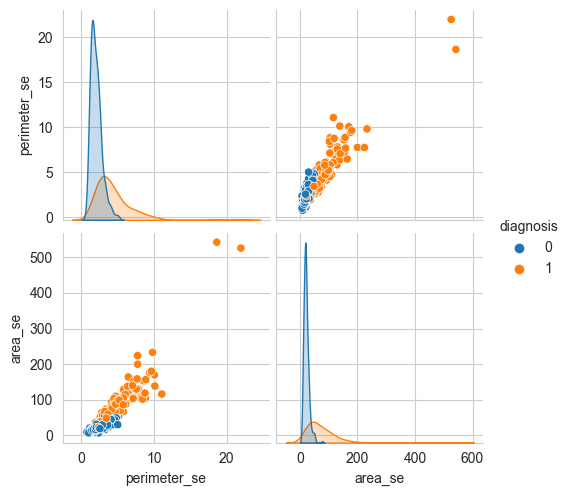

In [341]:
cols = ['diagnosis',
        "perimeter_se",
        "area_se"]

sns.pairplot(data=data[cols], hue='diagnosis')

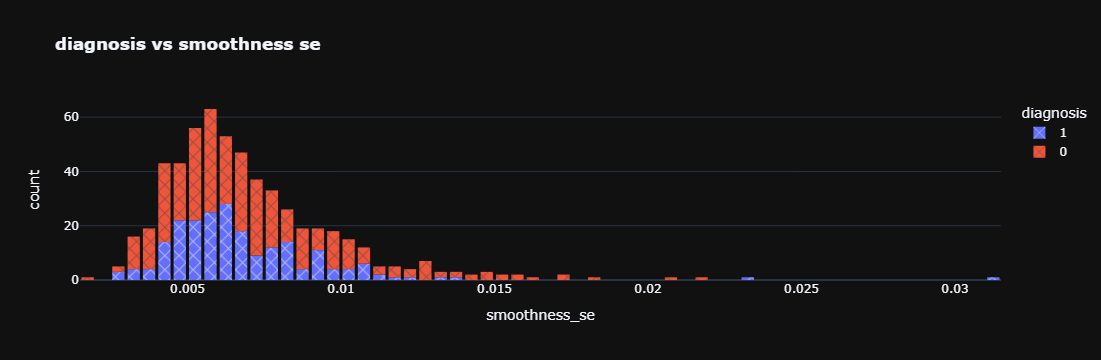

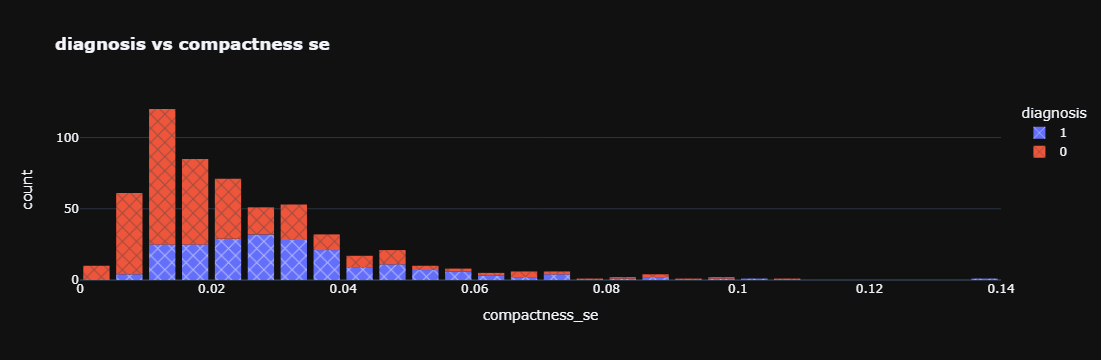

In [342]:
fig = px.histogram(data_frame = data,
             x = "smoothness_se",
             color="diagnosis", title="<b>diagnosis vs smoothness se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "compactness_se",
             color="diagnosis", title="<b>diagnosis vs compactness se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

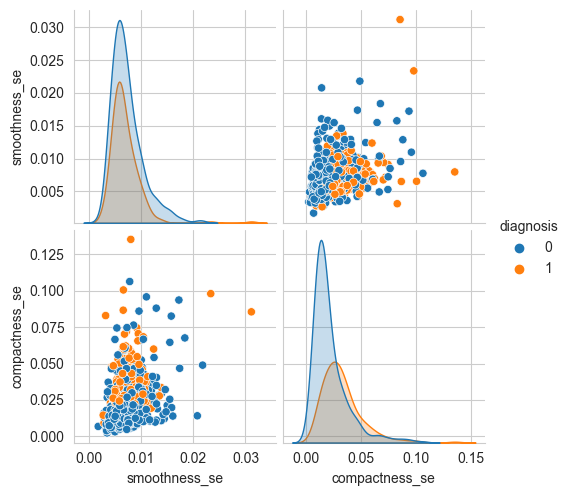

In [343]:
cols = ['diagnosis',
        "smoothness_se",
        "compactness_se"]

sns.pairplot(data=data[cols], hue='diagnosis')

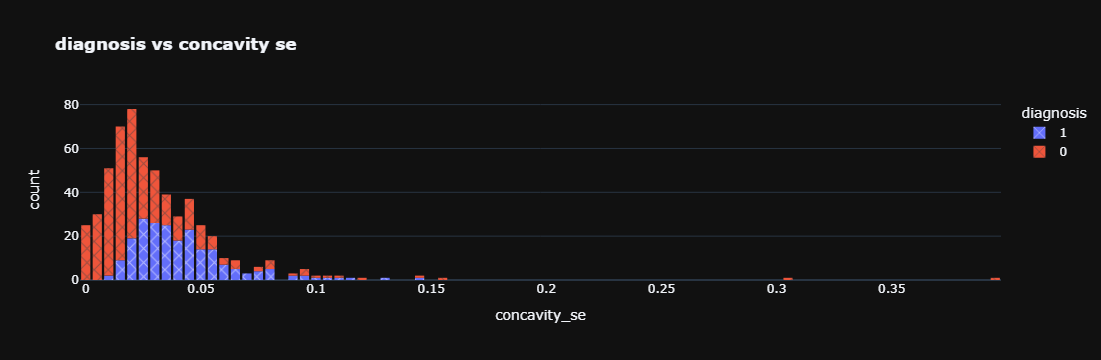

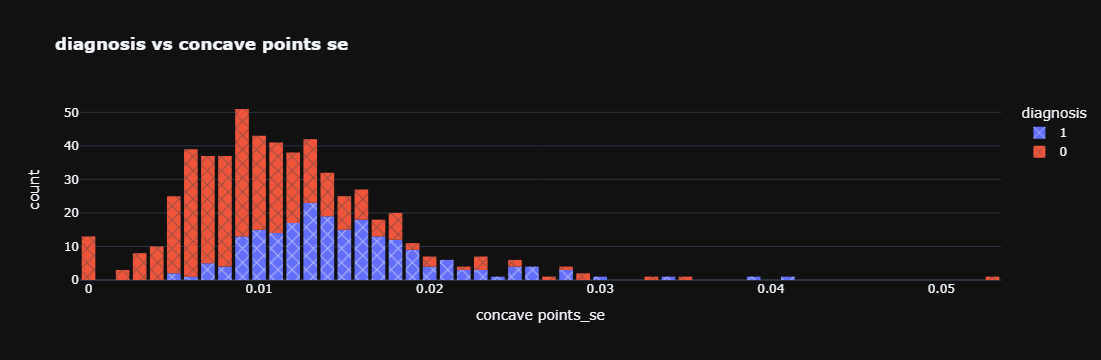

In [344]:
fig = px.histogram(data_frame = data,
             x = "concavity_se",
             color="diagnosis", title="<b>diagnosis vs concavity se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "concave points_se",
             color="diagnosis", title="<b>diagnosis vs concave points se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()


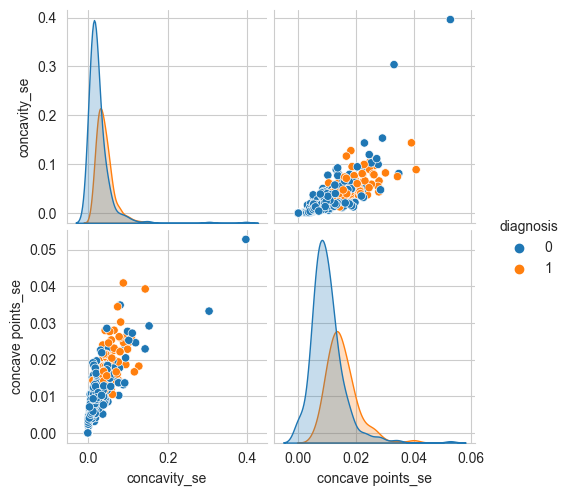

In [345]:
cols = ['diagnosis',
        "concavity_se",
        "concave points_se"
        ]

sns.pairplot(data=data[cols], hue='diagnosis')

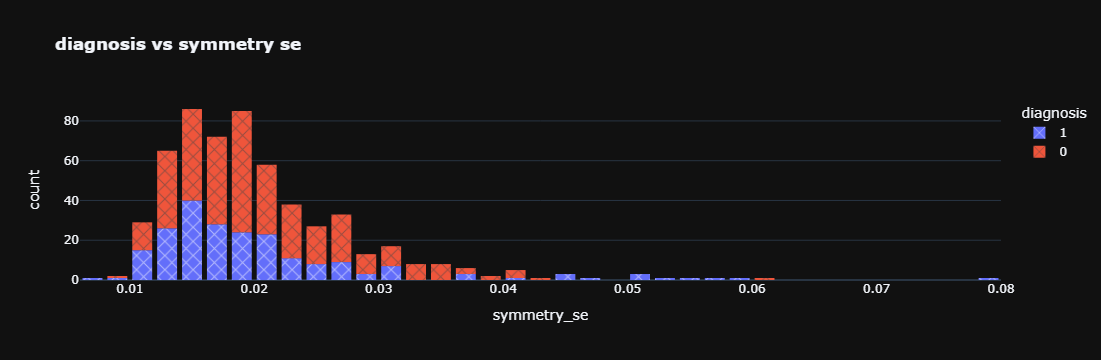

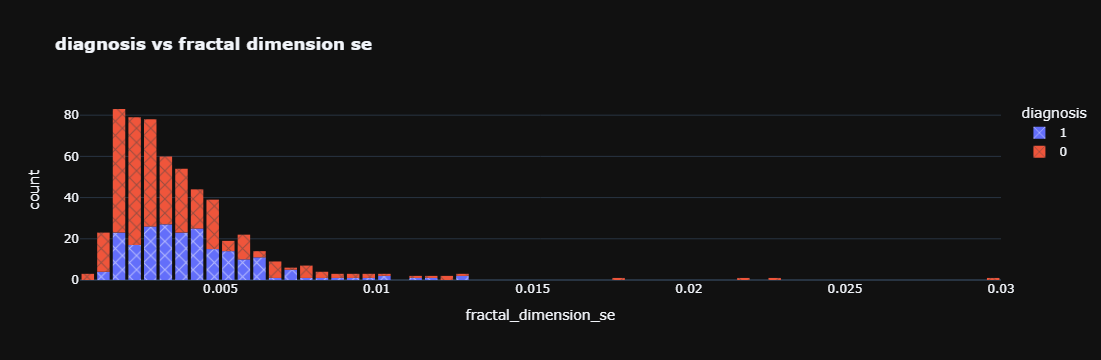

In [346]:
fig = px.histogram(data_frame = data,
             x = "symmetry_se",
             color="diagnosis", title="<b>diagnosis vs symmetry se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "fractal_dimension_se",
             color="diagnosis", title="<b>diagnosis vs fractal dimension se</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

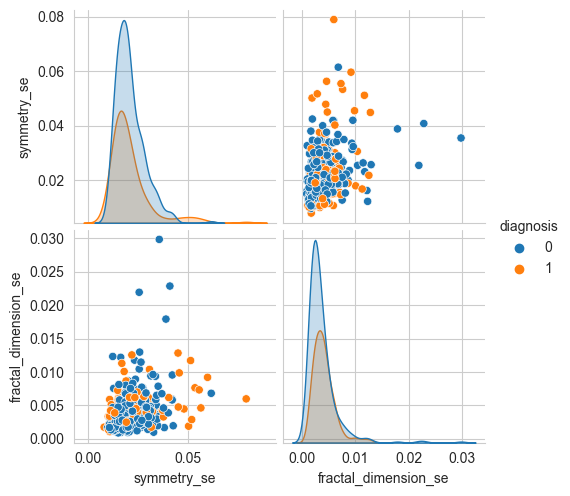

In [347]:
cols = ['diagnosis',
        "symmetry_se",
        "fractal_dimension_se"
        ]

sns.pairplot(data=data[cols], hue='diagnosis')

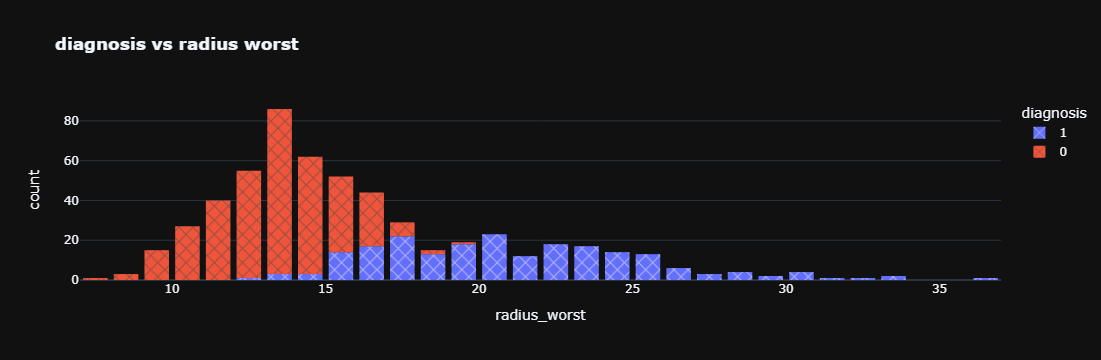

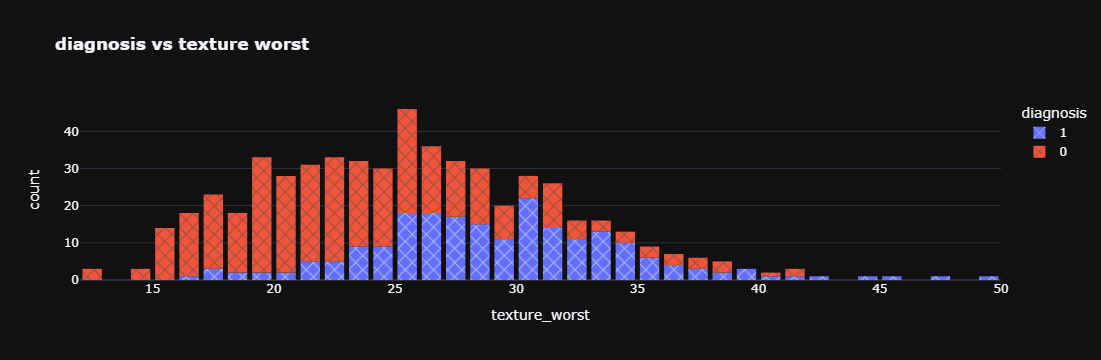

In [348]:
fig = px.histogram(data_frame = data,
             x = "radius_worst",
             color="diagnosis", title="<b>diagnosis vs radius worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "texture_worst",
             color="diagnosis", title="<b>diagnosis vs texture worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

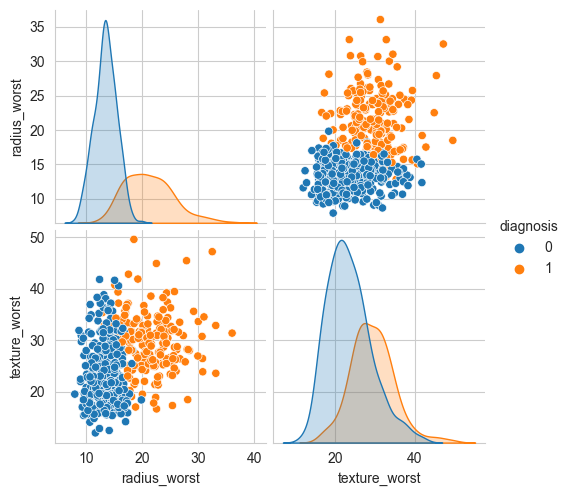

In [349]:
cols = ['diagnosis',
        "radius_worst",
        "texture_worst",
        ]

sns.pairplot(data=data[cols], hue='diagnosis')

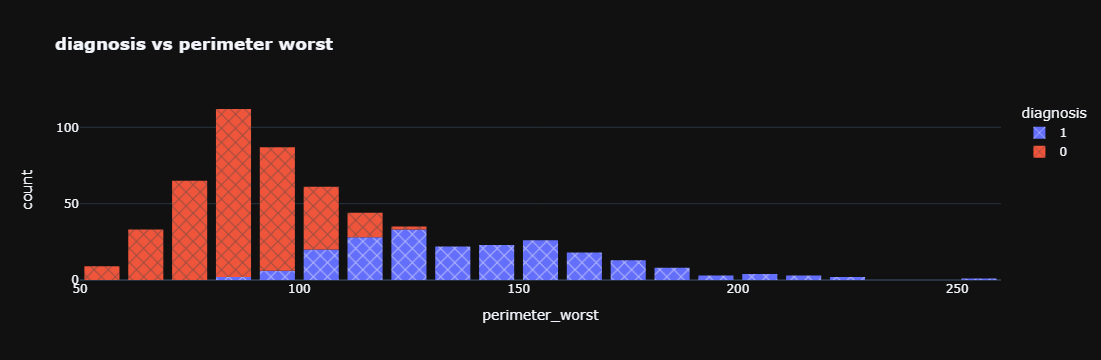

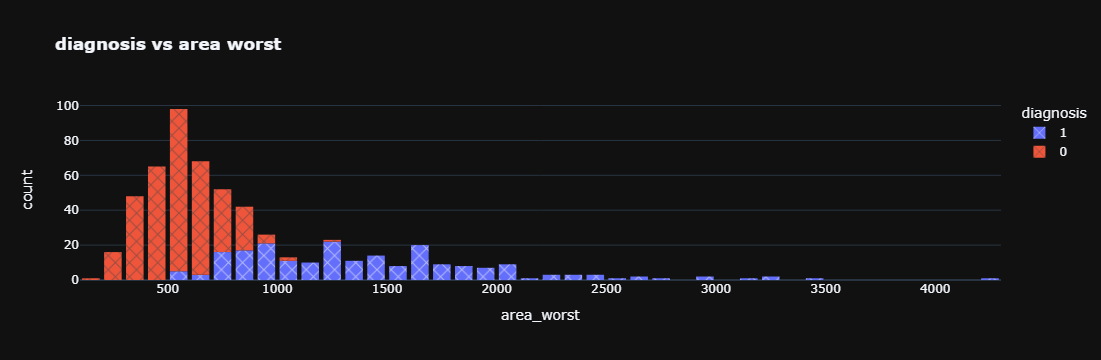

In [350]:
fig = px.histogram(data_frame = data,
             x = "perimeter_worst",
             color="diagnosis", title="<b>diagnosis vs perimeter worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "area_worst",
             color="diagnosis", title="<b>diagnosis vs area worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

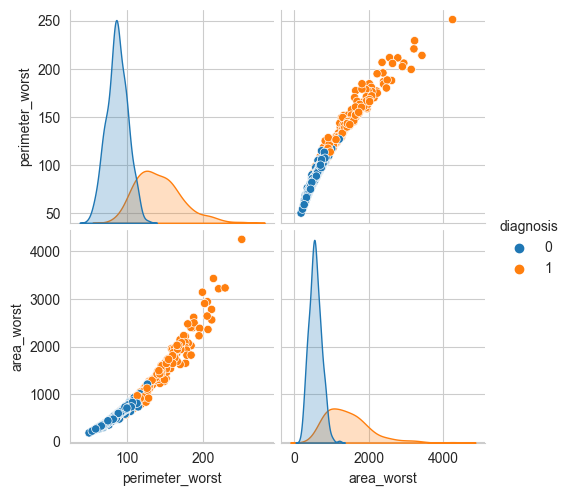

In [351]:
cols = ['diagnosis',
        "perimeter_worst",
        "area_worst"
        ]

sns.pairplot(data=data[cols], hue='diagnosis')

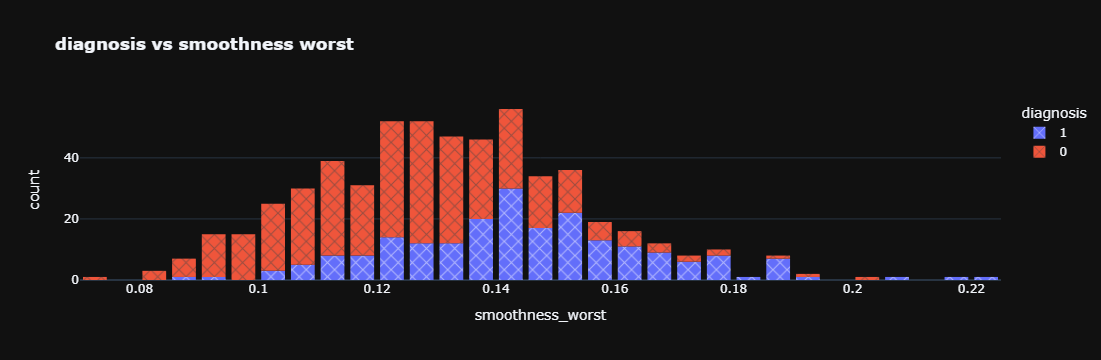

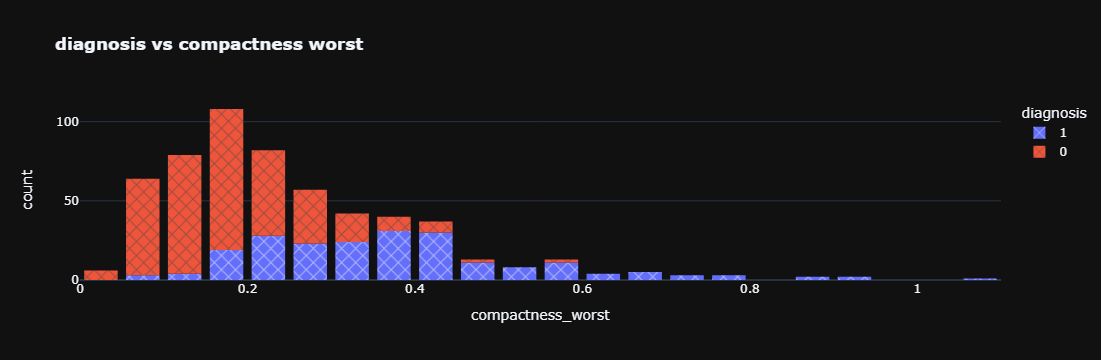

In [352]:
fig = px.histogram(data_frame = data,
             x = "smoothness_worst",
             color="diagnosis", title="<b>diagnosis vs smoothness worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "compactness_worst",
             color="diagnosis", title="<b>diagnosis vs compactness worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

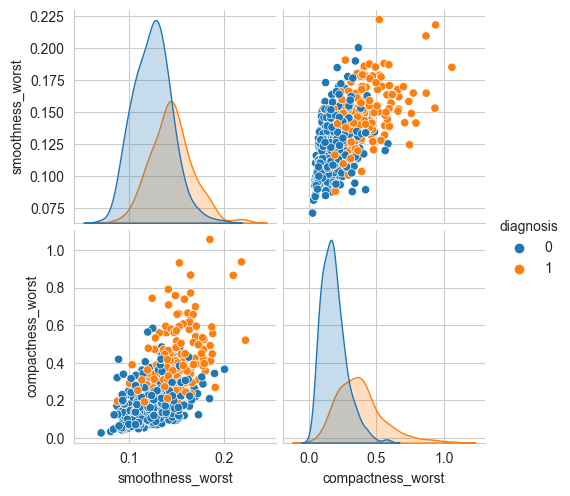

In [353]:
cols = ['diagnosis',
        "smoothness_worst",
        "compactness_worst",
        ]

sns.pairplot(data=data[cols], hue='diagnosis')


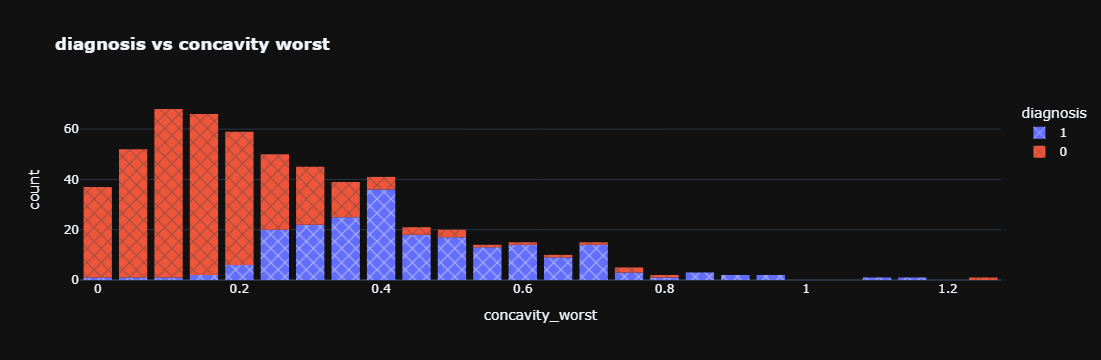

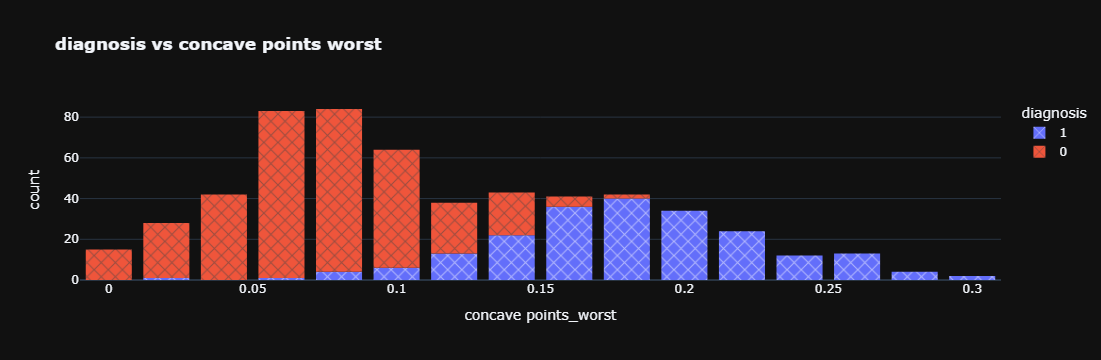

In [354]:
fig = px.histogram(data_frame =data,
             x = "concavity_worst",
             color="diagnosis", title="<b>diagnosis vs concavity worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "concave points_worst",
             color="diagnosis", title="<b>diagnosis vs concave points worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

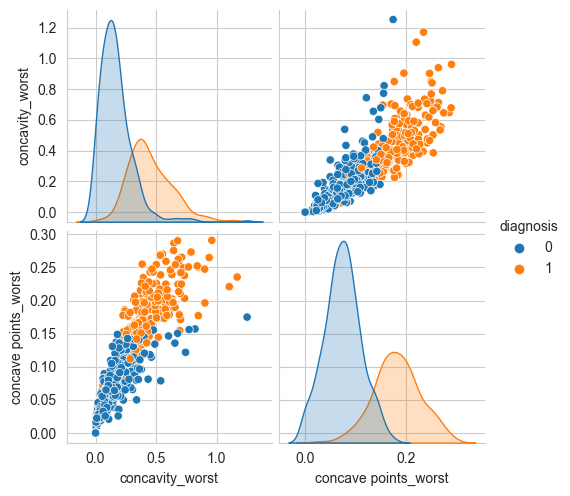

In [355]:
cols = ['diagnosis',
        "concavity_worst",
        "concave points_worst"
        ]

sns.pairplot(data=data[cols], hue='diagnosis')


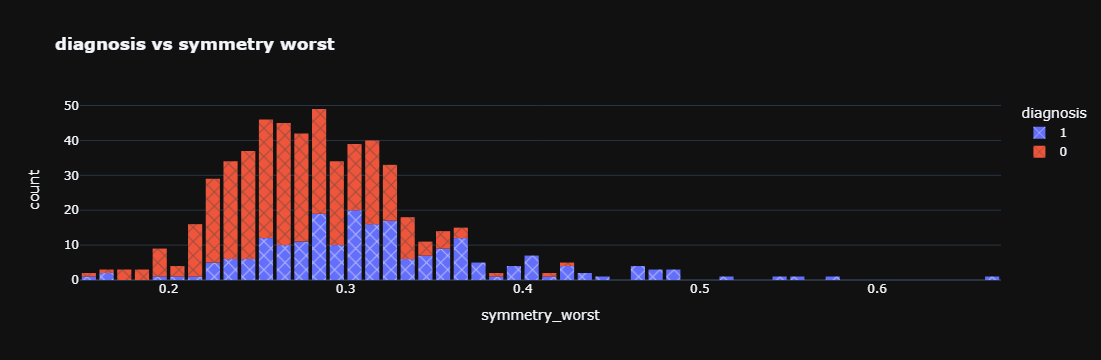

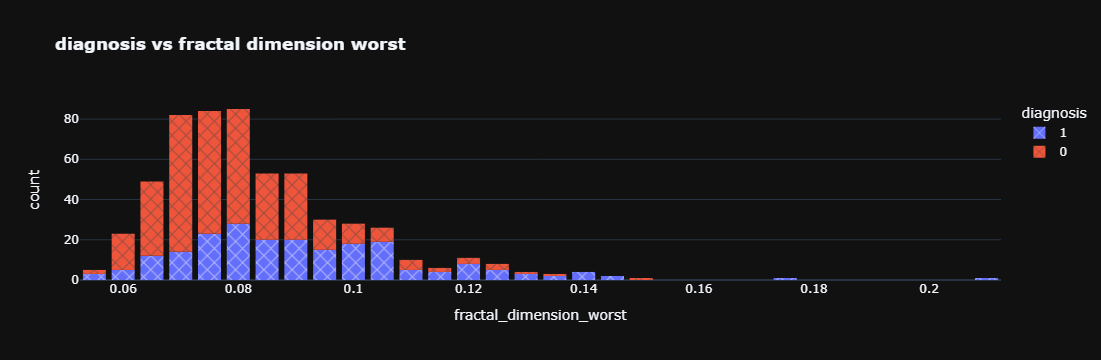

In [356]:
fig = px.histogram(data_frame = data,
             x = "symmetry_worst",
             color="diagnosis", title="<b>diagnosis vs symmetry worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig1 = px.histogram(data_frame = data,
             x = "fractal_dimension_worst",
             color="diagnosis", title="<b>diagnosis vs fractal dimension worst</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(bargap=0.2)
fig1.update_layout(bargap = 0.2)

fig.show()
fig1.show()

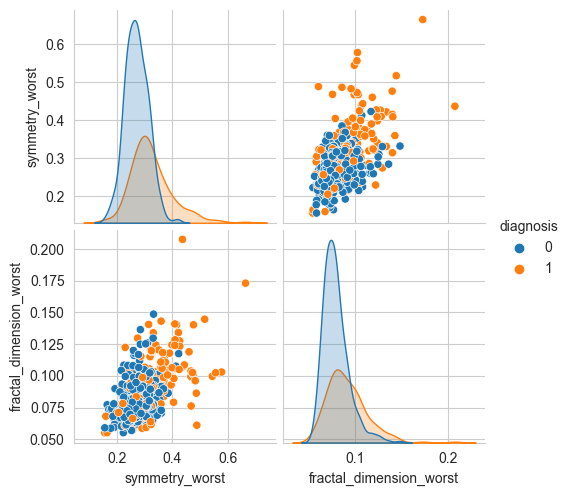

In [357]:
cols = ['diagnosis',
        "symmetry_worst",
        "fractal_dimension_worst"
        ]

sns.pairplot(data=data[cols], hue='diagnosis')


In [358]:
data1 = data.groupby('diagnosis').agg({'radius_mean' : 'mean', 'texture_mean' : 'mean', 'perimeter_mean' : 'mean',
       'area_mean' : 'mean', 'smoothness_mean' : 'mean', 'compactness_mean' : 'mean', 'concavity_mean' :'mean',
       'concave points_mean' : 'mean', 'symmetry_mean' : 'mean', 'fractal_dimension_mean' : 'mean',
       'radius_se' : 'mean', 'texture_se' : 'mean', 'perimeter_se' : 'mean', 'area_se' : 'mean', 'smoothness_se' : 'mean',
       'compactness_se' : 'mean', 'concavity_se' : 'mean', 'concave points_se' : 'mean', 'symmetry_se' : 'mean',
       'fractal_dimension_se' : 'mean', 'radius_worst' : 'mean', 'texture_worst' : 'mean',
       'perimeter_worst' : 'mean', 'area_worst' : 'mean', 'smoothness_worst' : 'mean',
       'compactness_worst' : 'mean', 'concavity_worst' : 'mean', 'concave points_worst' : 'mean',
       'symmetry_worst' : 'mean', 'fractal_dimension_worst': 'mean'})
data1
# displaying mean

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
0            12.146524     17.914762       78.075406  462.790196   
1            17.462830     21.604906      115.365377  978.376415   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
0                 0.092478          0.080085        0.046058   
1                 0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
0                     0.025717       0.174186                0.062867  ...   
1                     0.087990       0.192909                0.062680  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
0             13.379801      23.515070        87.005938   558.899440   
1             21.134811      29.318208       141.370330  1422.286321   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
0                  0.124959           0.182673         0.166238   
1                  0.144845           0.374824         0.450606   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
0                      0.074444        0.270246                 0.079442  
1                      0.182237        0.323468                 0.091530  

[2 rows x 30 columns]

In [359]:
data1.loc[0] > data1.loc[1]   # checking if in any data mean of m is less than b.

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean      True
radius_se                  False
texture_se                  True
perimeter_se               False
area_se                    False
smoothness_se               True
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                 True
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
dtype: boo

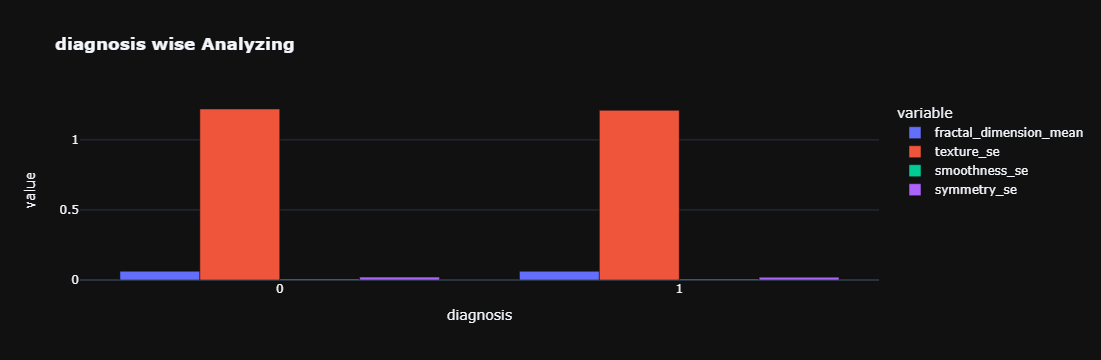

In [360]:
px.bar(data_frame=data1[['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se']], barmode='group',
       title = "<b>diagnosis wise Analyzing</b>",template="plotly_dark")

## Outliers

In [5]:
y = data.diagnosis
x = data.drop(["diagnosis"],axis=1)
columns = x.columns.tolist()

In [6]:
clf = LocalOutlierFactor()

In [7]:
y_pred = clf.fit_predict(x)
y_pred

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [8]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score
outlier_score

score
0   -1.422440
1   -1.066782
2   -0.978948
3   -1.596933
4   -1.069936
..        ...
564 -1.330082
565 -0.997906
566 -0.997441
567 -0.993730
568 -1.323238

[569 rows x 1 columns]

In [9]:
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()
outlier_index 

[38, 101, 212, 265, 461]

In [10]:
radius = (x_score.max() - x_score)/(x_score.max() - x_score.min())
outlier_score["radius"] = radius
outlier_score

score    radius
0   -1.422440  0.217679
1   -1.066782  0.055159
2   -0.978948  0.015022
3   -1.596933  0.297414
4   -1.069936  0.056600
..        ...       ...
564 -1.330082  0.175475
565 -0.997906  0.023685
566 -0.997441  0.023473
567 -0.993730  0.021777
568 -1.323238  0.172347

[569 rows x 2 columns]

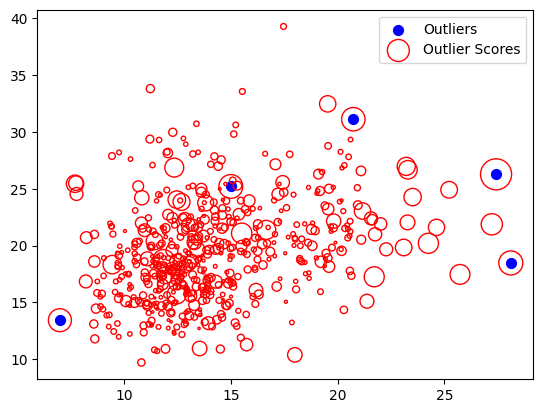

In [11]:
plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Outliers");
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=500*radius,edgecolors="r",facecolors="none",label="Outlier Scores");
plt.legend()
plt.show()

# Features Scaling

In [12]:
X = x.drop(outlier_index)
Y = y.drop(outlier_index).values

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [14]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Logistic Regression

In [15]:
clf = LogisticRegression(max_iter=1000)

In [16]:
clf.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [17]:
ypred = clf.predict(X_test)
ypred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [18]:
accuracy = clf.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9882352941176471


In [19]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': ypred})
data

Actual  Predicted
0         0          0
1         1          1
2         0          0
3         0          0
4         1          1
..      ...        ...
165       0          0
166       1          1
167       0          0
168       0          0
169       0          0

[170 rows x 2 columns]

In [20]:
cm = confusion_matrix(Y_test, ypred)
print(cm)

[[113   0]
 [  2  55]]


In [21]:
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       113
           1       1.00      0.96      0.98        57

    accuracy                           0.99       170
   macro avg       0.99      0.98      0.99       170
weighted avg       0.99      0.99      0.99       170



## SVM

In [22]:
clf = svm.SVC(C=0.001,kernel='poly',degree=5)
clf.fit(X_train,Y_train)

SVC(C=0.001, degree=5, kernel='poly')

In [23]:
y_pred1 = clf.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
accuracy = accuracy_score(Y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.6941176470588235


In [25]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred1})
data

Actual  Predicted
0         0          0
1         1          0
2         0          0
3         0          0
4         1          0
..      ...        ...
165       0          0
166       1          0
167       0          0
168       0          0
169       0          0

[170 rows x 2 columns]

In [26]:
cm2 = confusion_matrix(Y_test, y_pred1)
print(cm2)

[[113   0]
 [ 52   5]]


In [27]:
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       113
           1       1.00      0.09      0.16        57

    accuracy                           0.69       170
   macro avg       0.84      0.54      0.49       170
weighted avg       0.79      0.69      0.59       170



## Decision Tree

In [28]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [386]:
clf = tree.DecisionTreeClassifier()

In [387]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

In [388]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [277]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [389]:
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9294117647058824


In [390]:
y_pred2 = best_clf.predict(X_test)
print(y_pred2)

[0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0]


In [391]:
cm3 = confusion_matrix(Y_test, y_pred2)
print(cm3)

[[104   4]
 [  8  54]]


In [392]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       108
           1       0.93      0.87      0.90        62

    accuracy                           0.93       170
   macro avg       0.93      0.92      0.92       170
weighted avg       0.93      0.93      0.93       170



[Text(0.6634615384615384, 0.9285714285714286, 'x[23] <= 0.026\ngini = 0.466\nsamples = 394\nvalue = [248, 146]'),
 Text(0.4807692307692308, 0.7857142857142857, 'x[27] <= 0.689\ngini = 0.158\nsamples = 266\nvalue = [243, 23]'),
 Text(0.34615384615384615, 0.6428571428571429, 'x[27] <= 0.314\ngini = 0.055\nsamples = 249\nvalue = [242, 7]'),
 Text(0.19230769230769232, 0.5, 'x[13] <= 0.331\ngini = 0.017\nsamples = 230\nvalue = [228, 2]'),
 Text(0.11538461538461539, 0.35714285714285715, 'x[14] <= -1.24\ngini = 0.009\nsamples = 226\nvalue = [225, 1]'),
 Text(0.07692307692307693, 0.21428571428571427, 'x[28] <= -0.145\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.038461538461538464, 0.07142857142857142, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.11538461538461539, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15384615384615385, 0.21428571428571427, 'gini = 0.0\nsamples = 222\nvalue = [222, 0]'),
 Text(0.2692307692307692, 0.35714285714285715, 'x[8] <= 

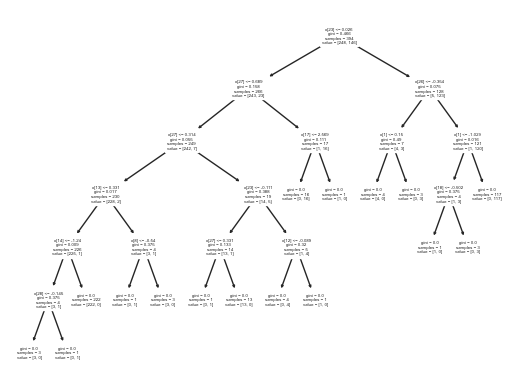

In [393]:
tree.plot_tree(best_clf)

## Random Forest 

In [16]:
clf4 = RandomForestClassifier(n_estimators=100, criterion='gini')

In [17]:
clf4.fit(X_train,Y_train)

RandomForestClassifier()

In [18]:
y_pred4 = clf4.predict(X_test)
y_pred4

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
accuracy = accuracy_score(Y_test, y_pred4)
print("Accuracy:", accuracy)

Accuracy: 0.9647058823529412


In [20]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred4})
data

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         1          1
..      ...        ...
165       0          0
166       0          0
167       0          0
168       0          0
169       0          0

[170 rows x 2 columns]

In [21]:
cm4 = confusion_matrix(Y_test, y_pred4)
print(cm4)

[[112   2]
 [  4  52]]


In [22]:
print(classification_report(Y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       114
           1       0.96      0.93      0.95        56

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



## KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
y_pred5=knn.predict(X_test)
y_pred5

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
accuracy = accuracy_score(Y_test, y_pred5)
print("Accuracy:", accuracy)

Accuracy: 0.9529411764705882


In [51]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred5})
data

Actual  Predicted
0         0          0
1         1          1
2         1          1
3         0          0
4         0          0
..      ...        ...
165       1          1
166       1          1
167       1          1
168       1          1
169       1          1

[170 rows x 2 columns]

In [52]:
cm6= confusion_matrix(Y_test, y_pred5)
print(cm6)

[[104   0]
 [  8  58]]


In [53]:
print(classification_report(Y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       104
           1       1.00      0.88      0.94        66

    accuracy                           0.95       170
   macro avg       0.96      0.94      0.95       170
weighted avg       0.96      0.95      0.95       170



## Summary

## So,the best model for this Dataset is LogisticRegression with 98.82 % accuracy

## Predict Cancer

In [17]:
patient1 = [17.99,
 10.38,
 122.8,
 1001.0,
 0.1184,
 0.2776,
 0.3001,
 0.1471,
 0.2419,
 0.07871,
 1.095,
 0.9053,
 8.589,
 153.4,
 0.006399,
 0.04904,
 0.05373,
 0.01587,
 0.03003,
 0.006193,
 25.38,
 17.33,
 184.6,
 2019.0,
 0.1622,
 0.6656,
 0.7119,
 0.2654,
 0.4601,
 0.1189]

In [18]:
patient1 = np.array([patient1])
patient1

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [19]:
clf.predict(patient1)


array([1], dtype=int64)

In [20]:
pred = clf.predict(patient1)
 
if pred[0] == 0:
  print('Patient has Cancer (malignant tumor)')
else:
  print('Patient has no Cancer (benign)')

Patient has no Cancer (benign)
